In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import segyio

In [2]:
filename1 = 'D:/Programing/Seismic Atribut Reservoir/seismic_isr_211122_5gb.sgy'

In [3]:

seismic = segyio.tools.cube(filename1)

In [4]:
seismic.shape

(1907, 509, 1626)

In [5]:
import bruges as bg

In [6]:
#Attribute untuk seismic 2D
seis=seismic[:1907,:509,746:1626]
ss=seis[:,150,:]
#Attribute untuk Trace Seismic
seis1=seismic[100]
seismictrace=seis1[99]
Attribute=pd.DataFrame(seismictrace)
Time=np.linspace(2,-6502,1626)
print(len(Time))
Attribute['Time']=Time
Attribute['timeabs']=Attribute['Time'].astype(int)


1626


In [7]:
from scipy import linalg, fft as sp_fft
def hilbert(x, N=None, axis=-1):
    x = np.asarray(x)
    if np.iscomplexobj(x):
        raise ValueError("x must be real.")
    if N is None:
        N = x.shape[axis]
    if N <= 0:
        raise ValueError("N must be positive.")

    Xf = sp_fft.fft(x, N, axis=axis)
    h = np.zeros(N, dtype=Xf.dtype)
    if N % 2 == 0:
        h[0] = h[N // 2] = 1
        h[1:N // 2] = 2
    else:
        h[0] = 1
        h[1:(N + 1) // 2] = 2

    if x.ndim > 1:
        ind = [np.newaxis] * x.ndim
        ind[axis] = slice(None)
        h = h[tuple(ind)]
    x = sp_fft.ifft(Xf * h, axis=axis)
    return x


In [8]:
#imaginer (gese fasa 90 derajat)
RT=seismictrace
Attribute['real']=RT
imaginer_trace = hilbert(RT)
I = imaginer_trace.imag
Attribute['Imajiner']= I
# reflection strength
RS = np.abs(imaginer_trace)
Attribute['reflectionsstrenght']=RS
# instantaneous phase
IP = np.arctan(RS/RT)
Attribute['Instantaneousphase']=IP
# instantaneous frequency
IF = np.divide(IP, abs(Time))
Attribute['Instantaneousfrequency']=IF
# # sweetness
Swe = RS/np.sqrt(IF)
Attribute['sweetness']=Swe


C:\Users\Sabda\AppData\Local\Temp\ipykernel_20728\3336526600.py:11: RuntimeWarning: divide by zero encountered in true_divide
  IP = np.arctan(RS/RT)
C:\Users\Sabda\AppData\Local\Temp\ipykernel_20728\3336526600.py:17: RuntimeWarning: invalid value encountered in sqrt
  Swe = RS/np.sqrt(IF)


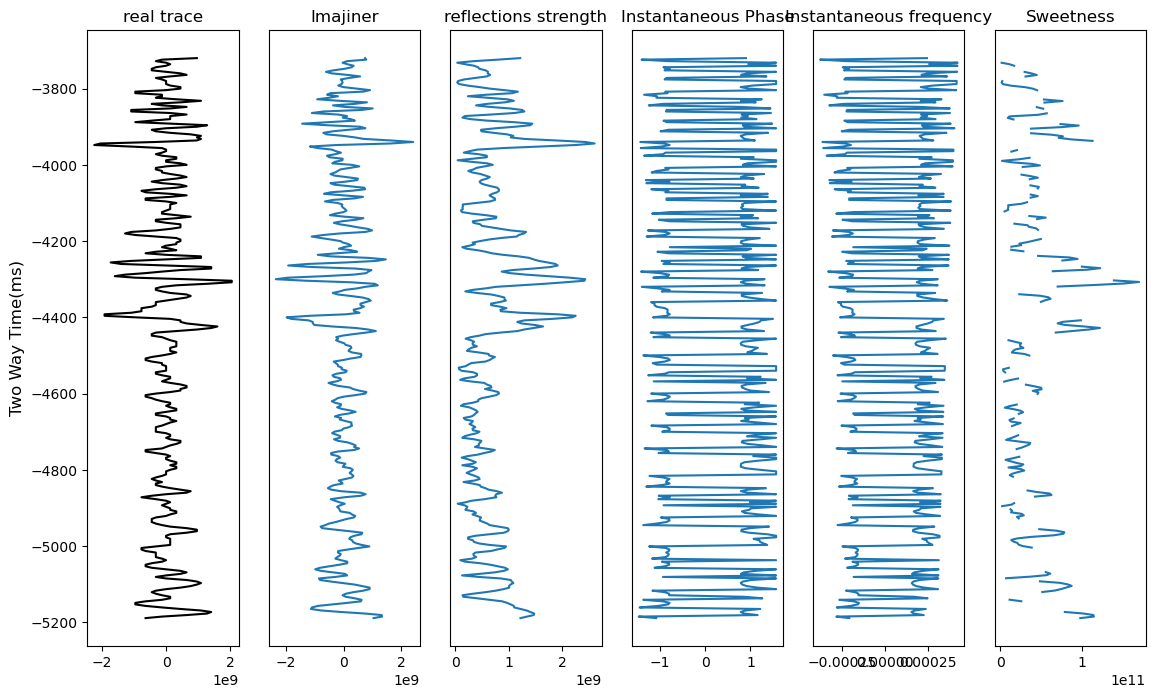

In [9]:

zbot = -5189; ztop = -3720
ll = Attribute[(Attribute.timeabs >= zbot) & (Attribute.timeabs <= ztop)]
plt.figure(figsize=(16,8) )

plt.subplot(1,7,1)
plt.plot(ll.real, ll.timeabs, 'black')
plt.title("real trace")
plt.ylabel("Two Way Time(ms)", fontsize = 12)

plt.subplot(1,7,2)
plt.plot(ll.Imajiner, ll.timeabs)
plt.title("Imajiner")
plt.yticks([])

plt.subplot(1,7,3)
plt.plot(ll.reflectionsstrenght, ll.timeabs)
plt.title("reflections strength")
plt.yticks([])

plt.subplot(1,7,4)
plt.plot(ll.Instantaneousphase, ll.timeabs)
plt.title("Instantaneous Phase")
plt.yticks([])

plt.subplot(1,7,5)
plt.plot(ll.Instantaneousfrequency, ll.timeabs)
plt.title("Instantaneous frequency")
plt.yticks([])

plt.subplot(1,7,6)
plt.plot(ll.sweetness, ll.timeabs)
plt.title("Sweetness")
plt.yticks([])


plt.show()

In [10]:
env = bg.attribute.envelope(ss)
phase = bg.attribute.instantaneous_phase(ss)

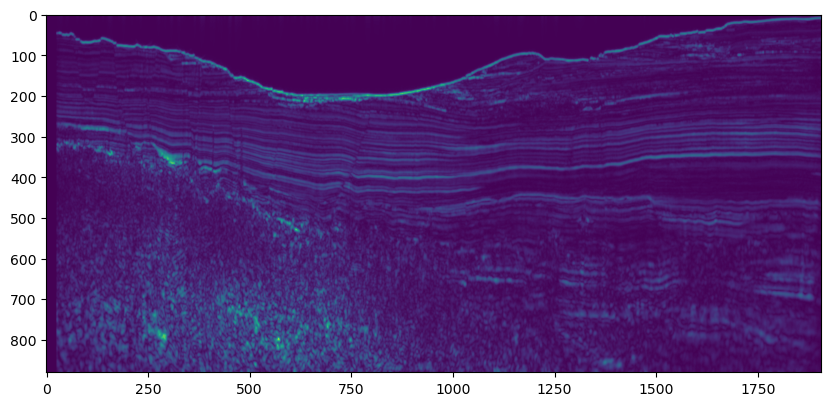

In [11]:
plt.figure(figsize=(10, 20))
plt.imshow(env.T, interpolation='bicubic')

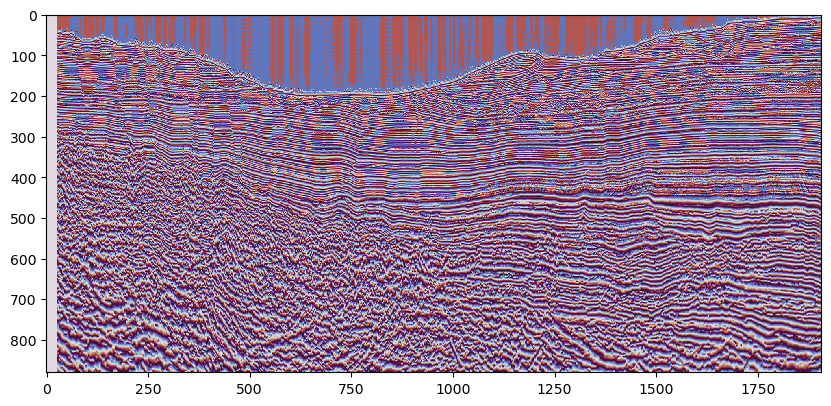

In [12]:
plt.figure(figsize=(10,20))
plt.imshow(phase.T, cmap='twilight_shifted', interpolation='none')

In [13]:
freq = bg.attribute.instantaneous_frequency(ss, dt=0.004)

c:\Users\Sabda\anaconda3\envs\pg\lib\site-packages\bruges\attribute\complex.py:45: RuntimeWarning: divide by zero encountered in log
  return np.abs(h) * np.sin(np.log(h).imag)
c:\Users\Sabda\anaconda3\envs\pg\lib\site-packages\bruges\attribute\complex.py:110: RuntimeWarning: invalid value encountered in true_divide
  expr = (traces[:-1] * y[1:] - traces[1:] * y[:-1]) / (traces[:-1] * traces[1:] + y[1:] * y[:-1])


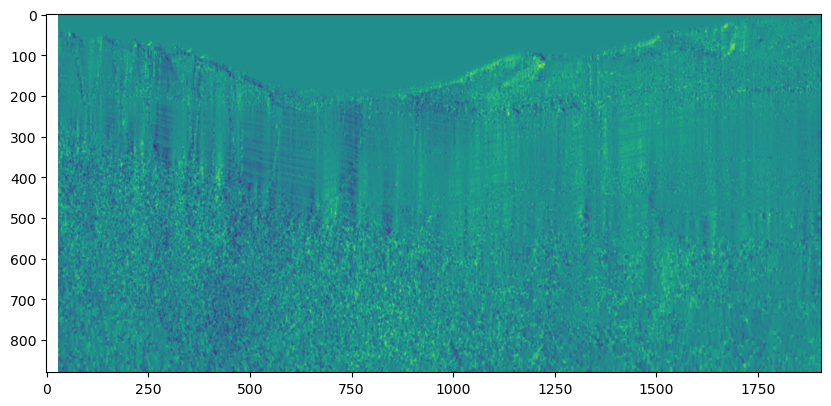

In [14]:
plt.figure(figsize=(10, 20))
plt.imshow(freq.T, interpolation='bicubic')

In [15]:
print(env.shape)
print(freq.shape)

(1907, 880)
(1906, 880)


In [16]:
envv=np.delete(env, 1, axis=0)

In [17]:
envv.shape

(1906, 880)

In [18]:
Swe = np.divide(envv,np.sqrt(freq))

C:\Users\Sabda\AppData\Local\Temp\ipykernel_20728\520512394.py:1: RuntimeWarning: invalid value encountered in sqrt
  Swe = np.divide(envv,np.sqrt(freq))
C:\Users\Sabda\AppData\Local\Temp\ipykernel_20728\520512394.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Swe = np.divide(envv,np.sqrt(freq))


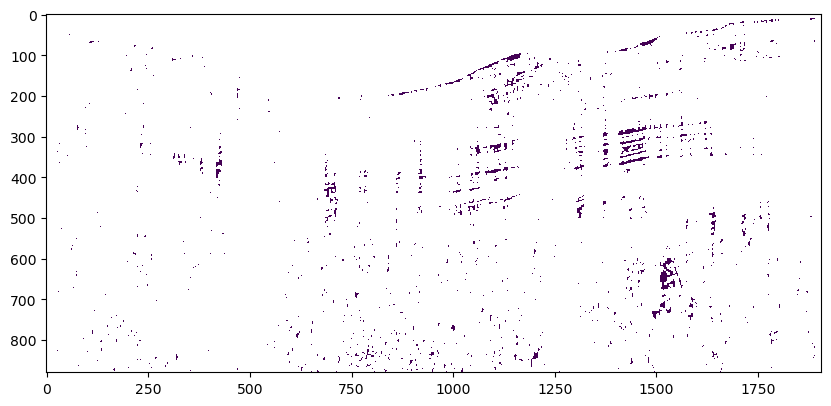

In [19]:
plt.figure(figsize=(10, 20))
plt.imshow(Swe.T, cmap='viridis')

In [20]:
import sys
sys.path.append('D:/Programing/computational-geophysics/seismic')


In [21]:
from seis_attribute import sliceAttribute, display_attribute
from seistool import openSegy3D, sliceCube

In [22]:
attributes = ['enve', 'inphase', 'cosphase', 'ampcontrast', 'ampacc', 
              'infreq', 'inband', 'domfreq', 'freqcontrast', 'sweet', 
              'quality', 'resphase', 'resfreq', 'resamp', 'apolar']

cmap = ['plasma', 'PuOr_r', 'gray', 'cubehelix', 'cubehelix',
        'jet', 'plasma', 'jet', 'jet', 'plasma',
        'plasma', 'plasma', 'jet', 'jet', 'jet']

vcol = [(0,15000), (None,None), (None,None), (-0.5,0.5), (-0.2,0.2),
        (0,50), (None,None), (0,50), (0,50), (0,2000),
        (0,300), (None,None), (0,50), (None,None), (None,None)]

plt.figure(figsize=(17,13))
for i in range(len(attributes)):
  # Compute attributes
  result = sliceAttribute(seismic, output='2d', type='il', inline_loc=200,
                          attribute_class='CompleTrace', 
                          attribute_type=attributes[i])
  
  # Plot attributes
  plt.subplot(5,3,i+1)
  display_attribute(result, seismic, 'il', cmap=cmap[i], vmin=vcol[i][0], vmax=vcol[i][1])
  plt.title(attributes[i])  

  # Zoom in the salt structure
  plt.xlim(600,1000)
  plt.ylim(1800,1300)

plt.tight_layout(1.01)

ModuleNotFoundError: No module named 'util'

<Figure size 1700x1300 with 0 Axes>